In [24]:
#!pip install nltk

In [1]:
cd ../Pickled_from_mongo/combined_eg_gulf_200k_sample.p

text_eda.ipynb


In [6]:
ls

combined_eg_gulf_1k_sample.p  combined_eg_gulf_200k_sample.p


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_pickle('../Pickled_from_mongo/combined_eg_gulf_200k_sample.p')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192936 entries, 0 to 95683
Data columns (total 5 columns):
_id             192936 non-null object
cleaned_geo     192936 non-null object
cleaned_name    192936 non-null object
cleaned_text    192936 non-null object
class           192936 non-null object
dtypes: object(5)
memory usage: 8.8+ MB


### Identify most frequent `locations` and `names`

In [11]:
df.cleaned_geo.value_counts().head()

                38822
Egypt           37687
Saudi Arabia    15317
Kuwait          10917
Bahrain          5499
Name: cleaned_geo, dtype: int64

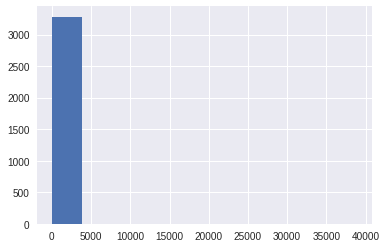

In [12]:
df.cleaned_geo.value_counts().hist()

In [15]:
df.cleaned_geo.unique()

array(['None', 'Egypt', 'فجأه لقتني منوفية', ...,
       'Williamsburg, VA ، الرياض', 'Insomnia', 'East - مملكتي'], dtype=object)

In [16]:
df.cleaned_name.nunique()

9485

### Conduct EDA on tweets

In [18]:
word_list = [word for line in df['cleaned_text'] for word in line.split()]

In [19]:
word_list[:10]

['أزاي', 'أقول', 'لك', 'كنا', 'زمان', 'والماضي', 'كان', 'فى', 'الغيب', 'بكره']

In [20]:
word_list.count('عجل')

37

In [21]:
len(word_list)

1964821

In [22]:
vocab = set(word_list)
vocab_size = len(vocab)
vocab_size

270839

In [25]:
from nltk.text import Text  
#nltk wrapper to conduct counting, concordancing, collocation, discovery, and more.

In [26]:
text_eda = Text(word_list)

In [27]:
def percentage(count, total):
    return 100 * count / total

In [28]:
percentage(text_eda.count('عجل'), len(text_eda))

0.0018831231954463028

In [32]:
text_eda.concordance("لأجل")

Displaying 25 of 85 matches:
كوا لاعنيكم أحسنوا إلى مبغضيكم وصلوا لأجل الذين يسيئون إليكم ويطرودكم" (مت ، )
و الله هما عارفين كل حاجه إلا عيوبهم لأجل من نحب نتحمل ما لا نحب مبحبش الناس ا
تتدخل اراده ربنا و تحل كل حاجه الصبر لأجل القدس دى كانت ءاخر تكة ميت إكلينيكيا
بسيطاً تكن أجمل عش كما أنت، لا تتصنع لأجل الناس،كل أولئك الذين تصنعوا لأجل الن
صنع لأجل الناس،كل أولئك الذين تصنعوا لأجل الناس خسروا أنفسهم وكل الناس،فمن لا 
د في شمال عمل فظيع لا يوصف إننا نصلي لأجل كل المتضررين، و… اللي يقدر يتبرع بال
 دماغي صح يا رب كل شويه بعملك لايكات لأجل ما تحس انى وتخش تكلمنى انما اقول ايه
ﻋﻴﻨﺎﻙِ ﻫﻤﺎ سكني صباحوو حلو عمرو قاتل لأجل ماتحب حتى لا تبكي كالحمقى عن ضياعه ك
تيريش هناك ألف سبب لتذهب، ولكنك تبقى لأجل سبب وحيد لا تفهمه فيروز مع كوبايه قه
لاقينا في٢٠١١ ومحصلش حاجة خالص حقيقي لأجل الورد ينسقي العليق صلّوا على الحبيب 
 شوقي اليه وانا شاغل بالي انادي عليه لأجل ما يحس علي دمه لكن هقول ايه جبلة مني
نَفْسِكَ الْيَوْمَ عَلَيْكَ حَسِيبًا لأجل كرة القدم ، لأجل المونديال ، لأجل مي
َ عَلَيْكَ حَسِيبًا لأج

In [34]:
from nltk import FreqDist

In [35]:
fdist1 = FreqDist(text_eda)

In [38]:
vocabulary1 = list(fdist1.keys())
vocabulary1[:30]

['أزاي',
 'أقول',
 'لك',
 'كنا',
 'زمان',
 'والماضي',
 'كان',
 'فى',
 'الغيب',
 'بكره',
 'واللي',
 'أحنا',
 'فيه',
 'دلوقت',
 'كمان',
 'ح',
 'يفوت',
 'علينا',
 'ولا',
 'ندري',
 'هي',
 'آراء',
 'آه',
 'بس',
 'أجويرو',
 'منتهي',
 'يعني',
 'أمال',
 'لو',
 'مكنش']

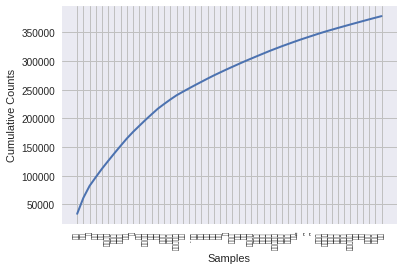

In [39]:
fdist1.plot(50, cumulative=True)

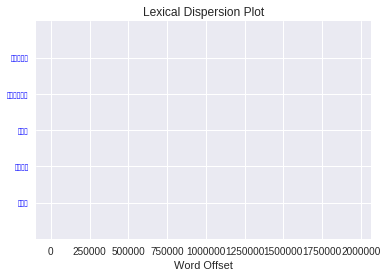

In [41]:
text_eda.dispersion_plot(["مغسلة", "ياخذون", "فقط", "داخل", "عجل"])

In [42]:
text_eda.similar("عجل")

الله من ما كدا خير كل مصر الناس تويتر اللي آخر صبرك بعض واحد أن حد يوم
نفسي بنت ان


In [44]:
fdist = FreqDist([len(w) for w in text_eda])

In [45]:
fdist.max()

4

In [46]:
fdist.items()

dict_items([(4, 461098), (2, 261495), (3, 344748), (7, 129838), (5, 365814), (1, 70778), (6, 239515), (8, 55309), (9, 19811), (11, 3148), (10, 7516), (15, 438), (13, 927), (16, 278), (14, 656), (12, 1651), (22, 56), (38, 15), (24, 38), (30, 112), (21, 55), (17, 226), (19, 117), (26, 36), (20, 140), (23, 46), (36, 11), (49, 11), (29, 29), (18, 141), (27, 36), (25, 38), (28, 31), (56, 10), (37, 19), (44, 11), (32, 27), (41, 9), (40, 18), (48, 11), (52, 12), (64, 6), (42, 5), (89, 3), (54, 11), (50, 15), (39, 8), (43, 10), (95, 4), (62, 8), (61, 7), (107, 1), (55, 4), (34, 10), (33, 25), (31, 18), (35, 16), (74, 3), (51, 8), (45, 11), (60, 8), (68, 1), (117, 1), (97, 1), (100, 5), (73, 6), (94, 1), (59, 7), (88, 3), (87, 3), (122, 1), (67, 8), (78, 215), (129, 1), (82, 7), (86, 6), (85, 2), (81, 3), (79, 5), (71, 3), (53, 7), (76, 3), (109, 2), (77, 1), (83, 2), (106, 2), (84, 2), (46, 13), (91, 1), (116, 3), (96, 3), (102, 1), (80, 2), (63, 3), (47, 9), (101, 1), (127, 2), (93, 2), (66, 